In [1]:
#load the data in network x graph
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import from_networkx



import math
import time

import torch

from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

random_seed = 7
#set the random seeds 
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)


/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
def load_data(season_no):

  #read the edge and node files
  dir = "./../data/original_data/"
  edge_file = dir + "got-s" + str(season_no) + "-edges.csv"
  node_file = dir + "got-s" + str(season_no) + "-nodes.csv"

  edges = pd.read_csv(edge_file)
  nodes = pd.read_csv(node_file)
  
  
  #only get those edges where the nodes are present
  node_ids = nodes['Id']
  

  edges = edges.drop(['Season'], axis=1)
  
  #Adjacency matrix
  gr = nx.Graph()
  adj = np.zeros( (len(node_ids),len(node_ids)) )

  for i in range(len(edges)):
    src_index = edges.iloc[i]['Source']
    dst_index = edges.iloc[i]['Target']
    gr.add_edge(src_index, dst_index, weight=edges.iloc[i]['Weight'])



  adj = torch.from_numpy(adj.astype(np.float32))
  print("adj max is {}".format(adj.max()))

  return adj, gr, node_ids


In [16]:
per_season_graph = []
per_season_adj = []
per_season_nodes = []
per_season_features = []
per_season_pyg_graph = []
per_season_normalized_adj = []

def normalize_adj(adj):
    return adj / adj.sum()

for i in range(1,9):
    adj, graph, node_ids = load_data(i)
    per_season_graph.append(graph)
    per_season_adj.append(adj)
    per_season_nodes.append(node_ids)
    per_season_pyg_graph.append(from_networkx(graph))
    per_season_normalized_adj.append(normalize_adj(adj))
    

adj max is 0.0
adj max is 0.0
adj max is 0.0
adj max is 0.0
adj max is 0.0
adj max is 0.0
adj max is 0.0
adj max is 0.0


In [18]:
a = per_season_graph[0]

In [19]:
a.edges

EdgeView([('NED', 'ROBERT'), ('NED', 'LITTLEFINGER'), ('NED', 'VARYS'), ('NED', 'ARYA'), ('NED', 'CERSEI'), ('NED', 'CATELYN'), ('NED', 'PYCELLE'), ('NED', 'JAIME'), ('NED', 'SANSA'), ('NED', 'JORY_CASSEL'), ('NED', 'JOFFREY'), ('NED', 'RENLY'), ('NED', 'BRAN'), ('NED', 'JON'), ('NED', 'BARRISTAN'), ('NED', 'ROBB'), ('NED', 'YOREN'), ('NED', 'BENJEN'), ('NED', 'JANOS'), ('NED', 'THEON'), ('NED', 'GENDRY'), ('NED', 'JON_ARRYN'), ('NED', 'TYRION'), ('NED', 'TYWIN'), ('NED', 'HOUND'), ('NED', 'RODRIK'), ('NED', 'STANNIS'), ('NED', 'TOBHO_MOTT'), ('NED', 'MHAEGEN'), ('NED', 'SEPTA_MORDANE'), ('NED', 'AERYS'), ('NED', 'BAELOR'), ('NED', 'HUGH_OF_THE_VALE'), ('NED', 'SYRIO_FOREL'), ('NED', 'TOMARD'), ('NED', 'MAESTER_LUWIN'), ('NED', 'MOUNTAIN'), ('NED', 'ILYN_PAYNE'), ('NED', 'LANCEL'), ('NED', 'LORAS'), ('NED', 'LYANNA'), ('NED', 'RICKARD_STARK'), ('NED', 'BERIC'), ('NED', 'BRANDON_STARK'), ('NED', 'DAENERYS'), ('NED', 'JEOR'), ('NED', 'MERYN_TRANT'), ('NED', 'MYCAH'), ('NED', 'PYP'), ('NE

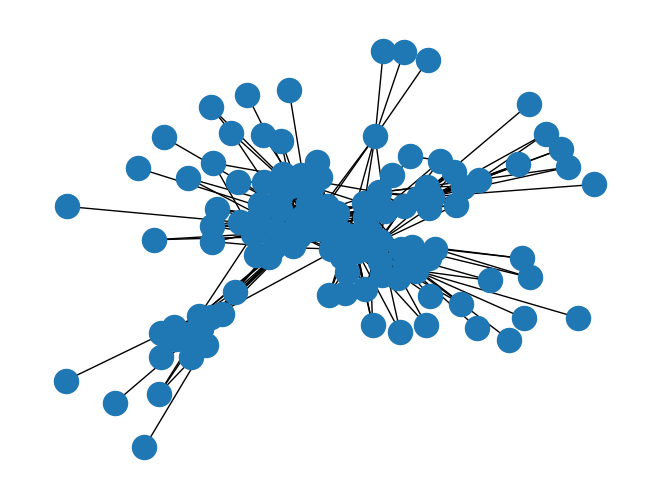

In [28]:
nx.draw_spring(a )